<a href="https://colab.research.google.com/github/KhaldounN/Weather-Prediction-/blob/master/FINAL_DSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 5.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
!pip3 install flair

     |████████████████████████████████| 450kB 4.2MB/s 
     |████████████████████████████████| 798kB 8.1MB/s 
     |████████████████████████████████| 19.7MB 1.2MB/s 
     |████████████████████████████████| 1.3MB 44.3MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 983kB 39.9MB/s 
     |████████████████████████████████| 1.1MB 38.5MB/s 
     |████████████████████████████████| 2.9MB 45.2MB/s 
     |████████████████████████████████| 890kB 28.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=53068ca5ff5cfd239ebc169269f52d4a0fad61a95f0ce1f5f1612567201715e7
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14377 sha256=91f5bdc710d22c71498738961e200e3689cce480a6de88f0ca6714ae98c206f4
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e

In [6]:

!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=86becebe36d1bb6f0af80bedb3eab76ba010978d00cc5343a0fd68d7cb2d0770
  Stored in directory: /tmp/pip-ephem-wheel-cache-knre_r5g/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


# Train Model to classify Emotions

                                               Input Sentiment
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger


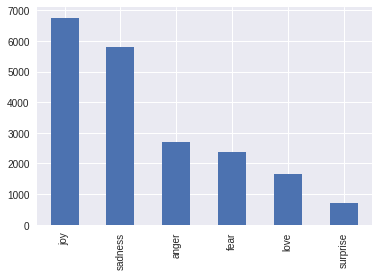

In [16]:
# Import data . data from source was saparerated so I can to concatenate it 

import pandas as pd 
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('/content/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val = pd.read_csv('/content/val.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df = pd.concat([df_train,df_test, df_val])


#check data balance 
print(df.head())
df['Sentiment'].value_counts().plot(kind = 'bar')

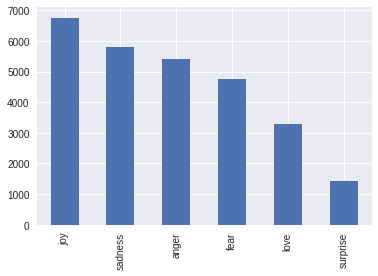

In [17]:
#douplicate the  imbalanced labels to balance data

df2 = df[df.Sentiment.isin(['fear','anger','love','surprise'])]
df = pd.concat([df,df2])
df['Sentiment'].value_counts().plot(kind = 'bar')

In [18]:
# Prepare Victorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer = token.tokenize)

# fit Victorizer 
X = cv.fit_transform(df['Input'])


In [19]:
#split data set 
from sklearn.model_selection import train_test_split

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=20)

In [20]:
#intial and fit the ML model
from sklearn.ensemble import RandomForestClassifier
model_emotions = RandomForestClassifier()
model_emotions.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
# Test Model and print Accuracy 
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

predicted = model_emotions.predict(X_test)
acc_score = metrics.accuracy_score(predicted,y_test)
prec_score = precision_score(y_test,predicted, average='macro')
recall = recall_score(y_test, predicted,average='macro')
f1 = f1_score(y_test,predicted,average='macro')
matrix = confusion_matrix(y_test,predicted)


print(str('Accuracy: '+'{:04.2f}'.format(acc_score*100))+'%')
print(str('Precision: '+'{:04.2f}'.format(prec_score*100))+'%')
print(str('Recall: '+'{:04.2f}'.format(recall*100))+'%')
print('F1 Score: ',f1)
print(matrix)


Accuracy: 93.51%
Precision: 92.87%
Recall: 94.35%
F1 Score:  0.9348131578622421
[[774   2   0   2   0   0]
 [ 13 704   0   0   4   5]
 [ 12  11 914  52  32   8]
 [  0   0  12 450   0   0]
 [ 37  26  22  15 811   3]
 [  0   9   0   2   0 197]]


In [22]:
# manual check on Model 

In [23]:
text  = ['this makes me happy' , ' this is a  let down ', ' I am sad ', ' I am pissed off' , 'I liked him alot', ' it disgust me']
result =model_emotions.predict(cv.transform(text))

results = pd.DataFrame(text,result)
results

,0
joy,this makes me happy
anger,this is a let down
sadness,I am sad
anger,I am pissed off
love,I liked him alot
anger,it disgust me


In [24]:
# Save the model using pickle 
import pickle
filename = 'emotions_detector.sav'
pickle.dump(model_emotions, open(filename, 'wb'))
pickle.dump(cv, open("vectorizer.pickle", "wb"))
#test Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
pickle.load(open("vectorizer.pickle", 'rb'))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                vocabulary=None)

# Importing needed libraries 


In [25]:
from flair.models import TextClassifier
from flair.data import Sentence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import math
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import spacy
nlp_md = spacy.load('en_core_web_md')
import plotly.express as px
import pickle

# Defining Functions 

In [65]:

# load book , clean data and split into sentences 
def Load_book(path):
  book = open(path, 'r').read()
  book = book.replace("_",' ')
  book = book.replace("\n",'')
  sentences  = book.split('.')

  return sentences 

# run sentiment analysis on each sentence in the book and save them into df_setiment 
def Analyzse_sentiment(sentences):
  tagger = TextClassifier.load('sentiment')
  df_sentiment = pd.DataFrame((np.zeros((4,int(len(sentences))))))
  for i, sentence in enumerate(sentences):
    warnings.filterwarnings('ignore')
    sentence = Sentence(sentence)
    tagger.predict(sentence)
    df_sentiment[i].update(sentence.labels)


  for i , sentence in enumerate(df_sentiment.iloc[0,:]):
      try:
        df_sentiment.iloc[1,i] = sentence.value
        if sentence.value == 'NEGATIVE':
          df_sentiment.iloc[2,i] = sentence.score * (-1)
        else:
          df_sentiment.iloc[2,i] = sentence.score
      except:
        pass

  return df_sentiment


# calcualte Major and Minor sentiment and vizualize it in a dashabord style

def Display_sentiment(df_sentiment  , booktitle = ' book title'):
  warnings.filterwarnings("always")

  l = df_sentiment.iloc[2,:]
  l = pd.DataFrame(l) 
  l['Major'] = l.iloc[:,0].rolling(40).mean()
  l['Minor'] = l.iloc[:,0].rolling(10).mean()

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15))
  axes[0].set_title((str(booktitle) + ' : Sentimental Tendency') , fontsize = 30  , loc='left')
  axes[0].plot(l['Major'])
  axes[0].set_xlabel('Sentences' , fontsize=20)
  axes[0].set_ylabel('Sentiment', fontsize=20)
  axes[0].legend(['Major Sentiment(rolling average for 30 sentences)'], fontsize=20)
  axes[0].fill_between(l.index, l['Major'] ,0 , where=l['Major'] >= 0, facecolor='lightgreen',  interpolate=True)
  axes[0].fill_between(l.index, l['Major'] ,0 , where=l['Major'] <= 0, facecolor='lightcoral',  interpolate=True)
  axes[0].set_facecolor('white')
  axes[1].plot(l['Minor'])
  axes[1].set_xlabel('Sentences' , fontsize=15)
  axes[1].set_ylabel('Sentiment' , fontsize=15)
  axes[1].fill_between(l.index, l['Minor'] ,0 , where=l['Minor'] >= 0, facecolor='lightgreen',  interpolate=True)
  axes[1].fill_between(l.index, l['Minor'] ,0 , where=l['Minor'] <= 0, facecolor='lightcoral',  interpolate=True)
  axes[1].set_facecolor('white')
  axes[1].legend(['Minor Sentiment(rolling average for 5 sentences)'] , fontsize=20)




# run emotions dedection on each sentence 
def Analyzse_Emotions(sentences):
  token = RegexpTokenizer(r'[a-zA-Z0-9]+')
  cv = pickle.load(open("vectorizer.pickle", 'rb'))
  df_emotions = pd.DataFrame((np.zeros((1,int(len(sentences))))))
  filename = 'emotions_detector.sav'
  model = pickle.load(open(filename, 'rb'))
  for i , sentence in enumerate( sentences):
    try:
        result = model.predict(cv.transform([sentence]))
        df_emotions[i].update(result)
    except:
      pass
  return df_emotions


# perform calculations on df_emotions and display results 
def Display_emotions(df_emotions , booktitle = 'Book Title'):
  
  l = df_emotions.T.value_counts().index
  l = l.tolist()
  v = df_emotions.T.value_counts()
  v = v.tolist()
  fig = go.Figure(data=go.Scatterpolar(r=v,theta=l,fill='toself'))
  fig.update_layout(polar=dict(radialaxis=dict(visible=False),),showlegend=False ,   title={
        'text': (str(booktitle)+' : Composition of Emotion ')})
  fig.show()


  df_emotions1 = df_emotions.T
  df_emotions1['Sentences(50)'] =  ((df_emotions1.index/50).astype(int))*50
  df_emotions1['1'] = df_emotions1.index
  data = df_emotions1.groupby(by=['Sentences(50)',0]).count()
  data = pd.DataFrame(data)
  data.reset_index(inplace=True)  
  data.columns = ['Sentences','Emotion','Count']
  fig = px.line(data,
                 x=	'Sentences' ,  y='Count', color='Emotion',
                 title=((str(booktitle)+" : Emotional Journey")))
  fig.show()



# The Below Function retrive a Data Frame containing all the Entities detected and entity label ( index is sentence in text)
def Analyze_entities(sentences):
  df_ent = pd.DataFrame((np.zeros((100,int(len(sentences))))))
  df_ents = pd.DataFrame((np.zeros((3,int(len(sentences))))))
  l = []
  for i , sentence in enumerate(sentences):
    doc = nlp_md(sentence)
    df_ent[i].update(doc.ents)
  for  j , raw in df_ent.iteritems():
    for i , item in enumerate(raw):
      item2 = item
      if str(item2) != '0.0':
        l = [j , item.text , item.label_]
        df_ents[j].update(l)
  df_ents = df_ents.T
  df_ents = df_ents[df_ents[1] != 0]
  df_ents.columns = ['index','entity','label']
  df_ents = df_ents[df_ents.label.isin([ 'PERSON' ,'NORP','GPE', 'LOC','EVENT', 'LAW'])]
  
  return df_ents
  
#the Below Function draw a Sunburt chart displaying entities mentioned alog with their types 

def Display_entities(df_ents , booktitle = 'Booktitle'):

  # replace label with more understandble labels :
  df_ents = df_ents.replace('NORP', 'Nationalities/groups')
  df_ents = df_ents.replace('PERSON', 'People')
  df_ents = df_ents.replace('GPE', 'Countries/Cities')
  df_ents = df_ents.replace('LOC', 'Locations')
  df_ents = df_ents.replace('EVENT', 'Event')
  df_ents = df_ents.replace('LAW', 'Laws')

  # FIRST FIGURE
  df_ents1 = df_ents
  df_ents1 = df_ents1.groupby(by=['label','entity']).count().sort_values(by='index', ascending=False).head(20)
  df_ents1 = df_ents1.reset_index(level=['label', 'entity'])
  df = px.data.tips()
  fig = px.sunburst(df_ents1, path=['label', 'entity'], values='index' , title=( str(booktitle)+" : Mentions of Entities (locations, nationalities, events, and characters)"))
  fig.show()

  #SECOND FIGURE
  df_ents2 = df_ents
  df_ents2['sentence'] = ((df_ents2.index/50).astype(int))*50
  df_ents2 = df_ents2.groupby(by=['sentence','label','entity']).count()
  df_ents2 = df_ents2.reset_index(level=['sentence','label','entity'])
  df_ents2 = df_ents2[df_ents2['index'] > 1]
  df_ents2.columns = ['sentence(every 50 senteces)', 'label', 'entity', 'count']
  fig = px.scatter(df_ents2,x='sentence(every 50 senteces)', y="entity",
	         size="count", color="entity")
  fig.show()

def Analyze_Book(path,booktitle="Book Title"):
  warnings.filterwarnings("always")
  sentences = Load_book(path)
  df_sent = Analyzse_sentiment(sentences)
  df_emo = Analyzse_Emotions(sentences)
  df_ent = Analyze_entities(sentences)
  Display_sentiment(df_sent , booktitle)
  Display_entities(df_ent , booktitle)
  Display_emotions(df_emo , booktitle )


In [42]:
spacy.explain('LAW')

'Named documents made into laws.'

In [ ]:
#s = Load_book('/content/Beyond good and Evil.txt')
#d = Analyze_entities(s)

In [45]:
d
d = d.replace('NORP', 'Groups')
d = d.replace('PERSON', 'People')
d = d.replace('GPE', 'Countries, cities')
d = d.replace('LOC', 'Locations')
d = d.replace('EVENT', 'Event')
d = d.replace('LAW', 'Laws')
d

,index,entity,label
0,0,﻿CHAPTER,"People, including fictional"
5,5,Whichthe Sphinx,"People, including fictional"
6,6,riskin,"People, including fictional"
8,8,ofdelusion,"People, including fictional"
13,13,topretence,"People, including fictional"
...,...,...,...
1513,1513,Ye,"People, including fictional"
1519,1519,Thou,"People, including fictional"
1521,1521,thereon?)--,"People, including fictional"
1525,1525,Unrestful,Nationalities or religious or political groups


In [ ]:
Analyze_Book('/content/On the Genealogy of Morality.txt' , 'On the Genealogy of Morality')

2020-12-16 14:28:42,766 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/content/On the Genealogy of Morality.txt' mode='r' encoding='UTF-8'>



In [28]:
#Analyze_Book('/content/beowulf.txt')

In [29]:
#Analyze_Book('/content/Thus Spoke Zarathustra.txt')

2020-12-16 14:22:29,496 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ResourceWarning:

unclosed file <_io.TextIOWrapper name='/content/Beyond good and Evil.txt' mode='r' encoding='UTF-8'>



2020-12-16 14:22:37,376 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:37,378 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:38,775 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:38,777 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:41,181 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:41,183 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:45,615 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:45,617 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:59,696 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-16 14:22:59,699 Warning: An empty Sentence was 

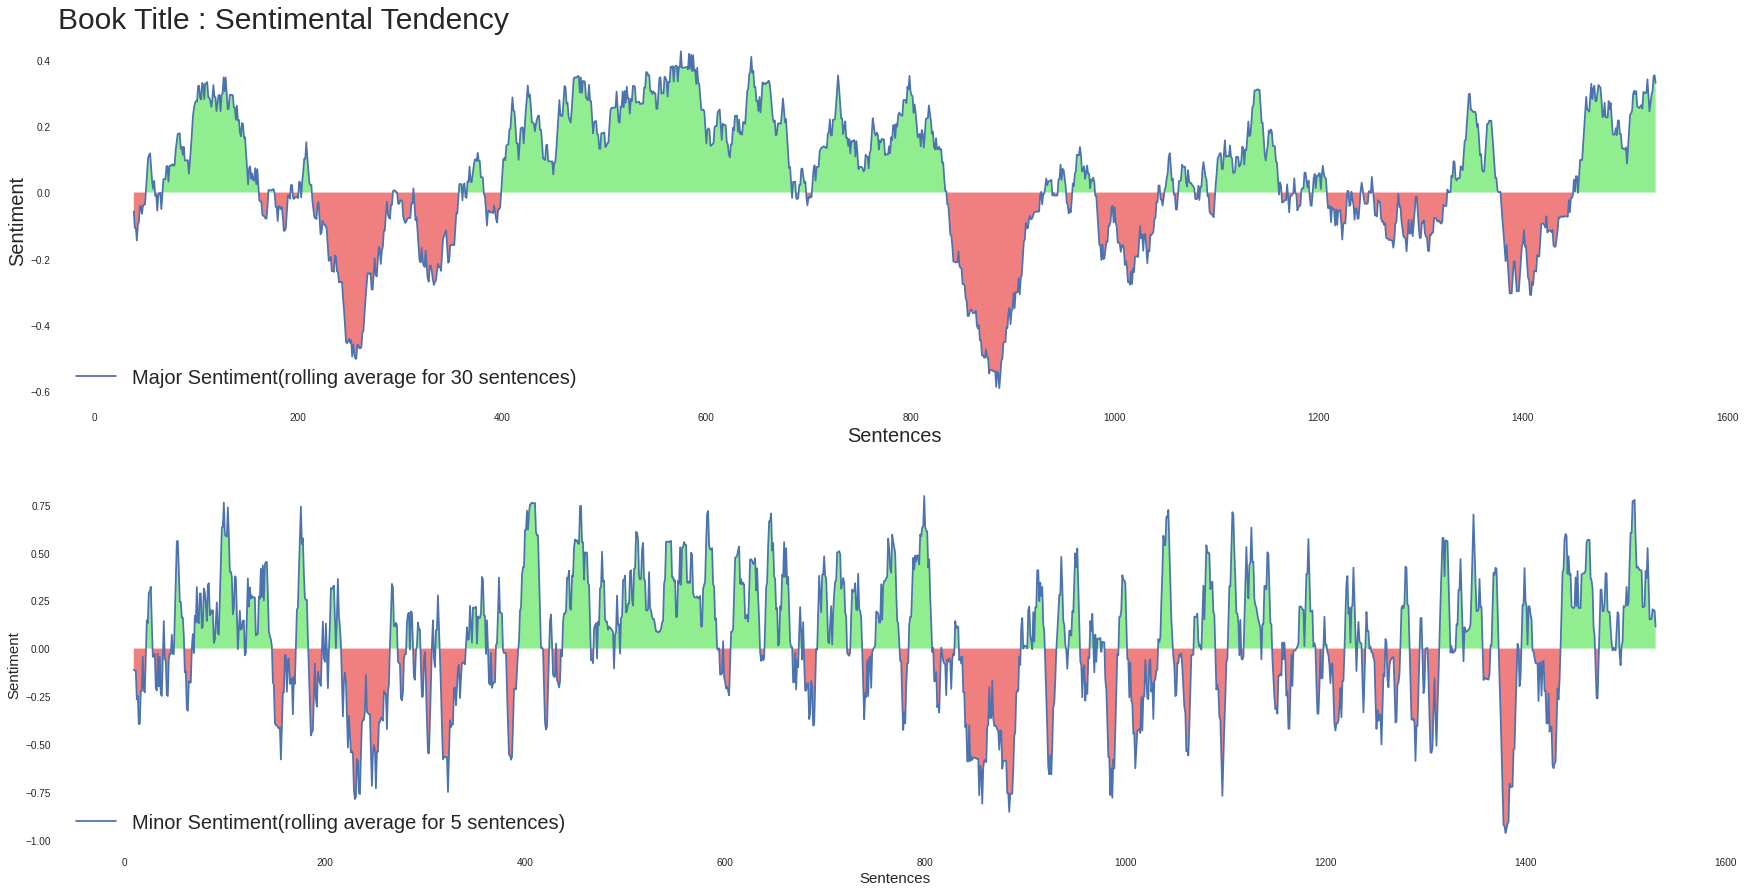

In [64]:
Analyze_Book('/content/Beyond good and Evil.txt')

In [31]:
#Analyze_Book('/content/The Antichrist.txt')